## Knowing about the dataset

**Happy** **Customer** **Bank** is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings. The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 


In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.



Now, the bank is looking for your help in **identifying** **customers** that could show higher intent towards a recommended credit card, given:

1. Customer details (gender, age, region etc.)
2. Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

So, given **.csv** file with the above particulars, we need to understand, preprocess/analyse, process & achieve required results. Therefore, we need to apply the Pre-processing, Processing, Post Processing steps on the data to find the suitable customers for the recommended credit card.

## Understanding the data

In [2]:
# Import required libraries

import numpy as np
import pandas as pd

In [3]:
# Export the data into python environment

data=pd.read_csv("train_s3TEQDk.csv")
data.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
# Shape of the dataset

data.shape

(245725, 11)

There were a total of 245725 rows & 11 columns. The information related to each and every column can be known from:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


So, the dataset comprises of both numerical & categorical features. The statistical entities of each of the features can be explained by:

In [6]:
data.describe(include='all')

#'all' includes every column, may it be a categorical feature.

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,WWHVOHVB,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


From the study of statistical features above, it is evident that they are not much outliers in the data except for **Vintage** as it has a min of 7.00 & max of 135.00 that shows a chance of outliers & mean is very affected due to this. This can be confirmed by the **Box** **Plot** for the outliers. 

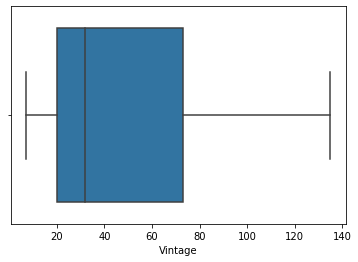

In [8]:
import seaborn as sns
sns.boxplot(data['Vintage'])

Visually, we can see that they were no influencing outliers in the data. So, we proceed to next step in the data model.

## Data Preparation:

In [9]:
# Dealing with missing values

data.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

There are large number of missing values in **Credit** **Product**. The missing values are to be treated either by imputation or others.

In [10]:
data['Credit_Product'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [11]:
# Imputing the missing values with "Unknown" in "Credit_Product" column

data = data.fillna("Unknown")
data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,Unknown,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


After Imputing with the **Unknown** values, again checking for the missing values if there are any in any of the columns. 

In [12]:
data.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

Therefore, They were no missing values in the data. It can also be shown visually as follows:

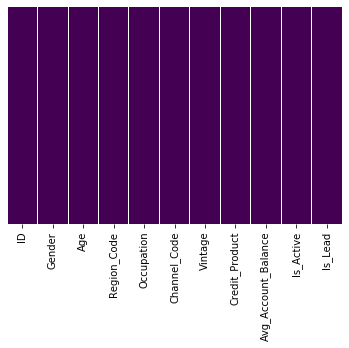

In [13]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
data.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


## Handling categorical variables

Finding the unique items such that accordingly, categorical variables are handled

In [16]:
data['Channel_Code'].unique()

array(['X3', 'X1', 'X2', 'X4'], dtype=object)

In [17]:
data['Credit_Product'].unique()

array(['No', 'Unknown', 'Yes'], dtype=object)

In [18]:
data['Occupation'].unique()

array(['Other', 'Salaried', 'Self_Employed', 'Entrepreneur'], dtype=object)

To convert **categorical** **values** into numerical or the **int** type, we use the library function **dummies**

In [47]:
data1=pd.get_dummies(data=data,columns=['Channel_Code','Is_Active','Credit_Product', 'Occupation', 'Gender'])
data1

,ID,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Lead,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,...,Is_Active_Yes,Credit_Product_No,Credit_Product_Unknown,Credit_Product_Yes,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Gender_Female,Gender_Male
0,NNVBBKZB,73,RG268,43,1045696,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,IDD62UNG,30,RG277,32,581988,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,HD3DSEMC,56,RG268,26,1484315,0,0,0,1,0,...,1,1,0,0,0,0,0,1,1,0
3,BF3NC7KV,34,RG270,19,470454,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,TEASRWXV,30,RG282,33,886787,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,51,RG284,109,1925586,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
245721,HFNB7JY8,27,RG268,15,862952,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,1
245722,GEHAUCWT,26,RG281,13,670659,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
245723,GE7V8SAH,28,RG273,31,407504,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0


Therefore, after handling the categorical data, the shape of the dataset is now found to be 245725 rows and 21 columns.

## Correlation between the variables

In [24]:
# This function is performed to know the highly correlated variables that may influence the model.

data.corr()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,1.000000,0.631242,0.145232,0.230814
Vintage,0.631242,1.000000,0.167433,0.279642
Avg_Account_Balance,0.145232,0.167433,1.000000,0.053370
Is_Lead,0.230814,0.279642,0.053370,1.000000


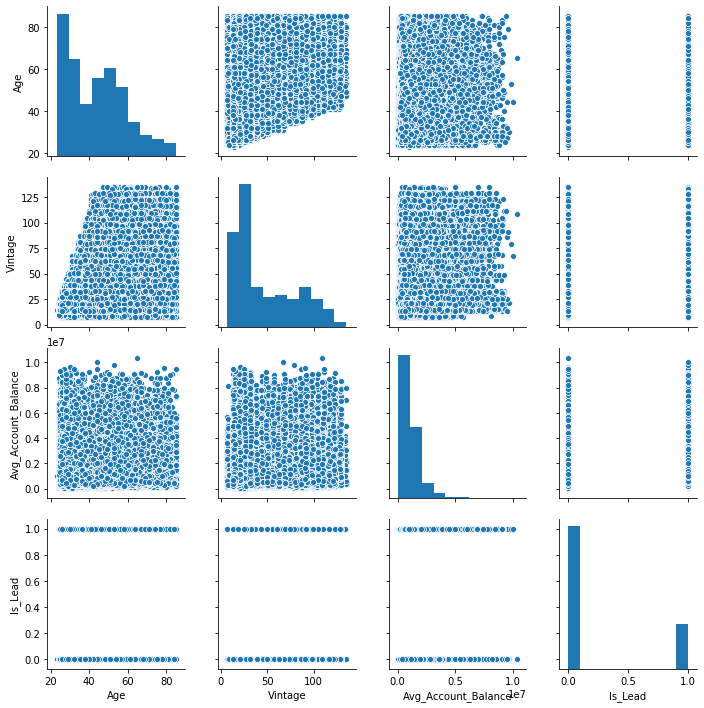

In [25]:
sns.pairplot(data)

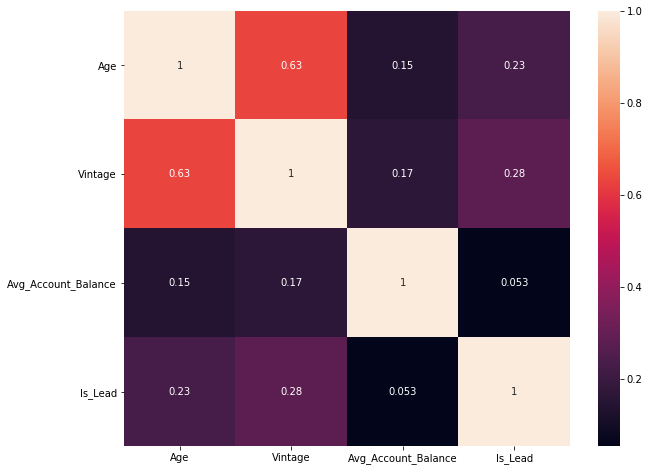

In [29]:
# Let's see the correlation matrix 
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))        # Size of the figure
sns.heatmap(data.corr(),annot = True)

From the above visualisations & matrix, it is found that there are no much highly correlated variables present in the dataset.

## Processing - Train the model:

In [55]:
data1.columns

Index(['ID', 'Age', 'Region_Code', 'Vintage', 'Avg_Account_Balance', 'Is_Lead',
       'Channel_Code_X1', 'Channel_Code_X2', 'Channel_Code_X3',
       'Channel_Code_X4', 'Is_Active_No', 'Is_Active_Yes', 'Credit_Product_No',
       'Credit_Product_Unknown', 'Credit_Product_Yes',
       'Occupation_Entrepreneur', 'Occupation_Other', 'Occupation_Salaried',
       'Occupation_Self_Employed', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [56]:
data1.head(5)

,ID,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Lead,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,...,Is_Active_Yes,Credit_Product_No,Credit_Product_Unknown,Credit_Product_Yes,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Gender_Female,Gender_Male
0,NNVBBKZB,73,RG268,43,1045696,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,IDD62UNG,30,RG277,32,581988,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,HD3DSEMC,56,RG268,26,1484315,0,0,0,1,0,...,1,1,0,0,0,0,0,1,1,0
3,BF3NC7KV,34,RG270,19,470454,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,TEASRWXV,30,RG282,33,886787,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [58]:
# Splitting the data into inputs to be taken and target to be achieved

targets = data1['Is_Lead']
inputs = data1.drop(['Is_Lead','Region_Code','ID'],axis=1)

In [60]:
#Importing the required libraries

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=365)

**Classification** is a task that requires the use of machine learning algorithms that learn how to assign a class label to examples from the problem domain. An easy to understand example is classifying emails as “spam” or “not spam.”

In [61]:
# Train the data using machine learning model - Decision tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1234)#max_depth = 8, min_samples_leaf=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [62]:
# Predictions arrived after training the model

pred_tree=dt.predict(X_test)
pred_tree

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [64]:
#metrics

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_tree)

0.7859599145386102

In [65]:
#Comparing actual vs predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_tree})  
df

,Actual,Predicted
2455,0,0
142079,0,0
13870,0,0
98873,0,0
60535,0,1
...,...,...
96759,1,0
201792,0,1
135441,0,1
89661,1,0


In [75]:
#Compare our decision tree to a logistic regression

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logistic regression and predict labels for the test set
logreg = LogisticRegression(random_state = 10)
logreg.fit(X_train, y_train)
pred_logit = logreg.predict(X_test)

# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(y_test, pred_tree)
class_rep_log = classification_report(y_test, pred_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Decision Tree: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86     37584
           1       0.54      0.56      0.55     11561

    accuracy                           0.79     49145
   macro avg       0.70      0.71      0.71     49145
weighted avg       0.79      0.79      0.79     49145

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.76      1.00      0.87     37584
           1       0.00      0.00      0.00     11561

    accuracy                           0.76     49145
   macro avg       0.38      0.50      0.43     49145
weighted avg       0.58      0.76      0.66     49145



C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [79]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
pred_random = classifier.predict(X_test)
pred_random

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
class_rep_random = classification_report(y_test, pred_random)

print("Random Forest: \n", class_rep_random)

Random Forest: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.90     37584
           1       0.69      0.57      0.62     11561

    accuracy                           0.84     49145
   macro avg       0.78      0.75      0.76     49145
weighted avg       0.83      0.84      0.83     49145



After applying the **Random** **forest** algorithm, the accuracy increased to 84%. Now we apply **Gradient** **Boosting** **Algorithm** to see whether the accuracy is increased further. 

In [83]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingClassifier

In [90]:
# parameter grid
param_grid = {"learning_rate": [0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }

In [91]:
# adaboost with the tree as base estimator
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [92]:
# run grid search
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               return_train_score=True,
                               verbose = 1)

grid_search_GBC.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  6.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=2,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=200,
                                                  n_iter_no_change=None,
                                                  presort=

In [93]:
cv_results = pd.DataFrame(grid_search_GBC.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,11.694589,0.215214,0.142451,0.006195,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.860363,0.859371,0.859430,0.859721,0.000454,3,0.860614,0.860728,0.861256,0.860866,0.000280
1,14.749254,0.214537,0.137368,0.004836,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.861141,0.859539,0.859430,0.860037,0.000782,2,0.860759,0.860751,0.861156,0.860889,0.000189
2,13.742906,0.092174,0.148605,0.003349,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.861065,0.859859,0.860284,0.860403,0.000499,1,0.860766,0.860858,0.861332,0.860985,0.000248
3,11.964324,0.087175,0.136165,0.005077,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.859218,0.858257,0.858728,0.858734,0.000393,7,0.860598,0.860629,0.861111,0.860779,0.000235
4,14.998714,0.141501,0.136316,0.005163,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.860103,0.859173,0.858987,0.859421,0.000488,5,0.862712,0.861613,0.862545,0.862290,0.000483


In [95]:
y_pred_GBC=grid_search_GBC.predict(X_test)

In [96]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_GBC})  
df 

,Actual,Predicted
2455,0,0
142079,0,0
13870,0,0
98873,0,0
60535,0,0
...,...,...
96759,1,0
201792,0,0
135441,0,0
89661,1,0


In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_GBC)

0.8608810662325771

Hence, we applied 4 machine learning models to train the data. The models applied & the accuracies obtained on a brief were given as:

1. Logistic Regression -    76%

2. Decision Tree       -    79%

3. Random Forest       -    84 %

4. Gradient Boosting   -    86 %

Out of the four machine learning models applied, "Gradient Boosting" has given me the highest accuracy. So, importing the original test data and applying the **Gradient** **Boosting** **Classifier** will provide me the required lead prediction for the credit card.

In [70]:
#Importing the original separate dataset provided.

test_data=pd.read_csv("test_mSzZ8RL.csv")

In [71]:
#Hence, the test dataset has the same number of columns as that of training data excluding the target variable "Is_Lead" 
# which is to be predicted.

test_data.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [72]:
#Performing the same feature engineering steps as that of training data on the imported test data so that data predicts the 
#target variable "popularity" correctly (as that of training data if it is trained in the same way.)

test_data.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

There were **missing** **values** in the test data also. Hence, need to handle those values. The other important thing is that the operations or the **data** **cleaning** steps performed for the training data should also be done for test data. 

In [73]:
test_data = data.fillna("Unknown")
test_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,Unknown,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [74]:
test_data.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

The missing values were imputed and now we see for correlated attributes if any.

In [100]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       245725 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [98]:
# Correlation between the variables was found using the "corr()" function.

test_data.corr()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,1.000000,0.631242,0.145232,0.230814
Vintage,0.631242,1.000000,0.167433,0.279642
Avg_Account_Balance,0.145232,0.167433,1.000000,0.053370
Is_Lead,0.230814,0.279642,0.053370,1.000000


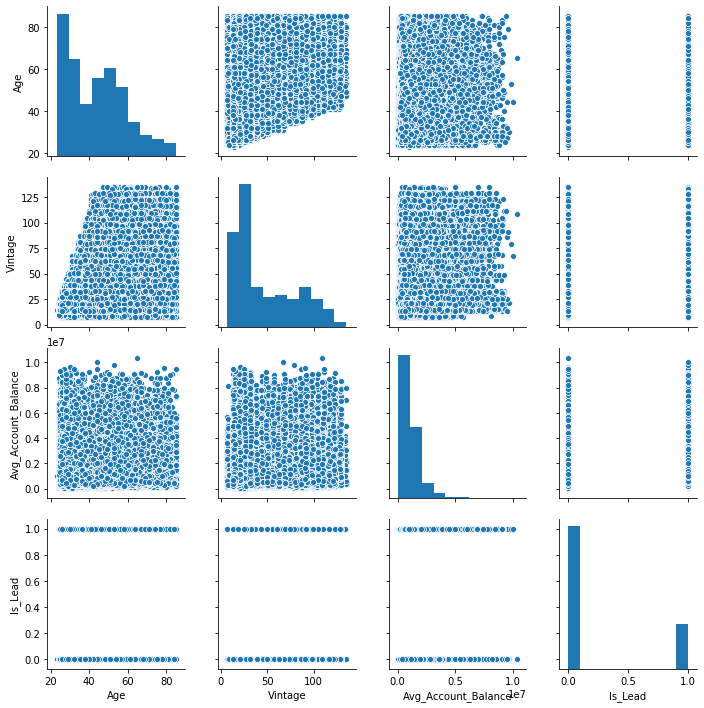

In [99]:
sns.pairplot(test_data)

There are no much correlated or influencing variables in the data.

In [77]:
#Handling Categorical variables

test_data1=pd.get_dummies(data=test_data,columns=['Channel_Code','Is_Active','Credit_Product', 'Occupation', 'Gender'])
test_data1

,ID,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Lead,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,...,Is_Active_Yes,Credit_Product_No,Credit_Product_Unknown,Credit_Product_Yes,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Gender_Female,Gender_Male
0,NNVBBKZB,73,RG268,43,1045696,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,IDD62UNG,30,RG277,32,581988,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,HD3DSEMC,56,RG268,26,1484315,0,0,0,1,0,...,1,1,0,0,0,0,0,1,1,0
3,BF3NC7KV,34,RG270,19,470454,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,TEASRWXV,30,RG282,33,886787,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,51,RG284,109,1925586,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
245721,HFNB7JY8,27,RG268,15,862952,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,1
245722,GEHAUCWT,26,RG281,13,670659,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
245723,GE7V8SAH,28,RG273,31,407504,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [102]:
#Hence, applying the highest obtained accuracy algorithm, i,e the GBC over the test data, we try to predict the results.

Is_Lead=grid_search_GBC.predict(X_test)
Is_Lead

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
# In a dataframe format:

df = pd.DataFrame({'Is_Lead': Is_Lead})  
df

,Is_Lead
0,0
1,0
2,0
3,0
4,0
...,...
49140,0
49141,0
49142,0
49143,0


In [110]:
# Metrics for leads

df['Is_Lead'].value_counts()

0    41505
1     7640
Name: Is_Lead, dtype: int64

In [116]:
# Confusion Matrix


from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Is_Lead)

array([[36126,  1458],
       [ 5379,  6182]], dtype=int64)

In [120]:
# Create the classification report for both models

from sklearn.metrics import classification_report
class_rep_GBC = classification_report(y_test, Is_Lead)

print("Gradient Boosting Classifier: \n", class_rep_GBC)

Gradient Boosting Classifier: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     37584
           1       0.81      0.53      0.64     11561

    accuracy                           0.86     49145
   macro avg       0.84      0.75      0.78     49145
weighted avg       0.86      0.86      0.85     49145



In [115]:
# Classification metrics

from sklearn.metrics import roc_auc_score

auc_score=roc_auc_score(y_test,Is_Lead)
auc_score

0.7479678631188686

In [113]:
#Exporting to an excel file for submission

submission=df['Is_Lead']
submission

submission.to_csv('Submission.csv', index=False)